In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [7]:
# 한글 시각화를 위한 seaborn 폰트 및 기본 설정
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

### 데이터 로드 및 확인

In [8]:
# # 데이터 호출하기
# data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data2'
# # data_dir = os.getenv('HOME')+'/aiffel/workplace/project/project_5'
# 
# aisles_data_path = join(data_dir, 'aisles.csv')
# departments_data_path = join(data_dir, 'departments.csv') 
# order_products__prior_data_path = join(data_dir, 'order_products__prior.csv') 
# order_products__train_data_path = join(data_dir, 'order_products__train.csv') 
# orders_data_path = join(data_dir, 'orders.csv') 
# products_data_path = join(data_dir, 'products.csv') 
# sample_data_path = join(data_dir, 'sample_submission.csv') 
# # total_data_path = join(data_dir, 'total_df.csv') 
# 
# aisles = pd.read_csv(aisles_data_path)
# dep = pd.read_csv(departments_data_path)
# prior = pd.read_csv(order_products__prior_data_path)
# train = pd.read_csv(order_products__train_data_path)
# orders = pd.read_csv(orders_data_path)
# products = pd.read_csv(products_data_path)
# sample = pd.read_csv(sample_data_path)
# # df = pd.read_csv(total_data_path)
# 
# print(f'aisles data dim : {aisles.shape}')
# print(f'departments data dim : {departments.shape}')
# print(f'order_products_prior data dim : {order_products_prior.shape}')
# print(f'order_products_train data dim : {order_products_train.shape}')
# print(f'orders data dim : {orders.shape}')
# print(f'products data dim : {products.shape}')

In [9]:
aisles = pd.read_csv("aisles.csv")
dep = pd.read_csv("departments.csv")
prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")
order = pd.read_csv("orders.csv")
product = pd.read_csv("products.csv")
submission = pd.read_csv("sample_submission.csv")

aisles.csv
- aisle_id: 통로 번호
- aisle: 통로 이름(제품이 위치한 구역)


departments.csv
- department_id: 부서 번호
- department: 부서 이름(물품 카테고리)


order_products__prior.csv / order_products__train.csv  
prior는 모든 고객의 이전 주문 내역이 포함되어있습니다.
- order_id: 주문 번호
- product_id: 구매한 제품의 번호
- add_to_cart_order: 카트에 담은 순서
- reordered: 재구매 여부


orders.csv
- order_id: 주문 번호
- user_id: 유저(구매자)의 번호(식별 번호)
- eval_set: 데이터가 속한 데이터셋(prior, train, test)
- order_number: 주문의 순서(1이 첫 구매)
- order_dow: 주문 요일
- order_hour_of_day: 주문이 이루어진 시각
- days_since_prior_order: 재방문까지 걸린 일자


products.csv
- product_id: 제품 번호
- product_name: 제품 이름
- aisle_id: 통로 번호(제품 위치)
- department_id: 부서 번호(물품 카테고리)

* 메모리 다이어트 함수 설정

In [10]:
# def reduce_mem_usage(train_data):
#     
# #  iterate through all the columns of a dataframe and modify the data type to reduce memory usage."""
#     start_mem = train_data.memory_usage().sum() / 1024**2
#     print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
# 
#     for col in train_data.columns:
#         col_type = train_data[col].dtype
# 
#         if col_type != object:
#             c_min = train_data[col].min()
#             c_max = train_data[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     train_data[col] = train_data[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     train_data[col] = train_data[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     train_data[col] = train_data[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     train_data[col] = train_data[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     train_data[col] = train_data[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     train_data[col] = train_data[col].astype(np.float32)
#                 else:
#                     train_data[col] = train_data[col].astype(np.float64)
#         else:
#             train_data[col] = train_data[col].astype('category')
#         end_mem = train_data.memory_usage().sum() / 1024**2
#         print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#         print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
# 
#     return train_data

In [11]:
# reduce_mem_usage(prior)
# reduce_mem_usage(train)
# reduce_mem_usage(product)
# reduce_mem_usage(order)
# reduce_mem_usage(dep)
# reduce_mem_usage(aisles)
# print('complete!')

### 데이터 병합

In [12]:
product

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


* 총 약 50000개의 제품 존재

In [13]:
print(len(prior) + len(train))
ot = pd.concat([prior, train])
ot = ot.sort_values(by='order_id').reset_index(drop=True)
ot

33819106


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,10246,3,0
2,1,49683,4,0
3,1,43633,5,1
4,1,13176,6,0
...,...,...,...,...
33819101,3421083,35211,5,0
33819102,3421083,39678,6,1
33819103,3421083,11352,7,0
33819104,3421083,4600,8,0


* 33819106개의 EDA재료

In [14]:
item_info = pd.merge(product, aisles, on ="aisle_id")
item_info

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes
...,...,...,...,...,...
49683,47769,Peas and Potatoe Roti Paratha,76,6,indian foods
49684,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6,indian foods
49685,48480,Punjab Eggplant,76,6,indian foods
49686,48830,Pav Bhaji Mashed Vegetable Curry,76,6,indian foods


In [15]:
item_info = pd.merge(item_info, dep, on="department_id")
item_info

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [16]:
df = pd.merge(item_info, ot, on="product_id")
print(df.shape)
df

(33819106, 9)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,6695,7,1
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0
...,...,...,...,...,...,...,...,...,...
33819101,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3054471,19,1
33819102,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3136178,12,0
33819103,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3174062,10,0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3220368,16,0


In [17]:
df = pd.merge(df, order, on='order_id')
print(df.shape)
df

(33819106, 15)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,46149,Zero Calorie Cola,77,7,soft drinks,beverages,1107,6,0,38259,prior,2,1,11,7.0
2,9434,Bag of Large Lemons,34,1,frozen meat seafood,frozen,1107,2,0,38259,prior,2,1,11,7.0
3,769,Sliced American Cheese,21,16,packaged cheese,dairy eggs,1107,10,0,38259,prior,2,1,11,7.0
4,12078,Shredded Mexican Blend Cheese,21,16,packaged cheese,dairy eggs,1107,9,0,38259,prior,2,1,11,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,prior,30,3,10,1.0
33819102,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2733396,1,0,30511,prior,24,4,11,0.0
33819103,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,3152383,1,0,10113,train,12,3,19,13.0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,31522,1,1,31188,prior,3,3,11,4.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   aisle                   object 
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


### 가장 많이 팔린 품목 확인

In [19]:
top_product = df['product_name'].value_counts().head(10)
top_product

product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: count, dtype: int64

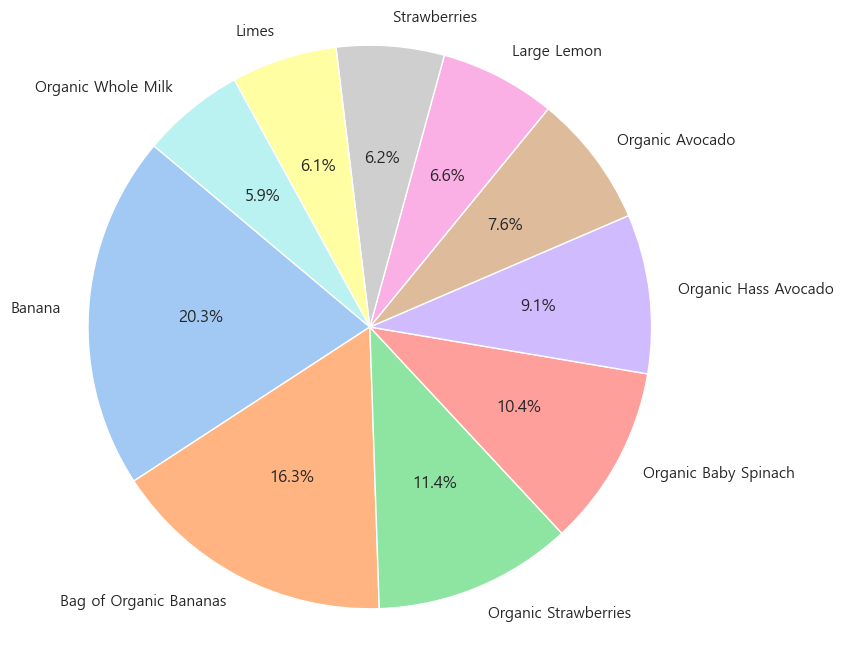

In [20]:
labels = top_product.index
sizes = top_product.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.show()

### 1. 바나나 구매왕 찾기 이벤트!
a. 바나나 부자 : 제일 많은 바나나를 사신 분

In [21]:
# 전체 판매 품목중 Banana 단어가 들어간 품목 골라내기
banana_df = product[product['product_name'].str.contains('Banana')].reset_index(drop=True)
banana_df

,product_id,product_name,aisle_id,department_id
0,63,Banana & Sweet Potato Organic Teething Wafers,92,18
1,313,Peppermint/Banana Split Variety Pack Frozen Da...,37,1
2,426,2nd Foods Bananas,92,18
3,602,Banana Chocolate Chip,52,1
4,849,Blueberry & Banana Tiny Fruits Freeze Dried Sn...,92,18
...,...,...,...,...
371,49201,"Banana, Peach and Mango Fruit Pouch",92,18
372,49310,Oatmeal & Banana Baby Cereal,92,18
373,49337,Stage 2 Banana Sweet Pea Papaya Baby Food,92,18
374,49498,Beeswax & Banana Hand Creme,127,11


In [22]:
# Banana가 들어간 품목중 순수 Banana만 골라냄
selected_products = ["Green Bananas", "Banana", "Bag of Organic Bananas", "Red Banana", "Baby Banana", "Baby Bananas", "Manzano Banana", "Organic Banana", "Bananas"]
banana_df2 = df[df['product_name'].isin(selected_products)]
banana_df2

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
11,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,1107,3,1,38259,prior,2,1,11,7.0
278,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,43669,1,1,199115,prior,20,1,18,26.0
473,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,82631,6,1,60380,prior,26,4,10,10.0
583,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,107716,2,1,80421,prior,8,0,14,18.0
606,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,108894,11,1,137274,prior,16,1,15,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33751178,39276,Bananas,24,4,fresh fruits,produce,3151988,1,1,152799,prior,55,0,12,2.0
33751179,39276,Bananas,24,4,fresh fruits,produce,3217685,1,1,193215,prior,17,3,18,10.0
33751180,39276,Bananas,24,4,fresh fruits,produce,3256309,1,1,193215,prior,7,0,15,3.0
33751181,39276,Bananas,24,4,fresh fruits,produce,3258045,1,1,11397,prior,33,1,16,10.0


In [23]:
# 순수 Banana 구매 고객중 상위 30명 선정
banana_df3 = banana_df2['user_id'].value_counts().sort_values(ascending=False).head(30)
banana_df3

user_id
99707     98
124991    97
69919     97
178107    95
54804     93
189425    92
194931    92
74315     92
32971     91
120232    91
90110     89
41356     89
71049     89
64320     88
53673     86
105213    85
171132    85
9682      84
54594     84
174046    84
184451    84
132298    83
31087     83
47855     83
54485     83
67440     82
195804    82
27353     82
175540    82
126715    81
Name: count, dtype: int64

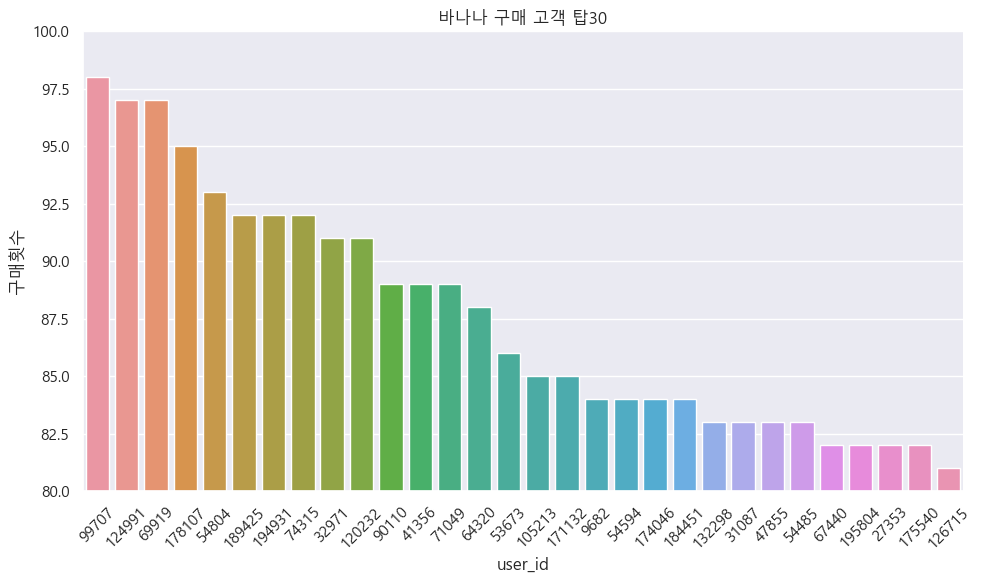

In [24]:
plt.figure(figsize=(10, 6))

sns.barplot(x=banana_df3.index.astype(str), y=banana_df3.values)
plt.title('바나나 구매 고객 탑30')
plt.xlabel('user_id')
plt.ylabel('구매횟수')
plt.ylim(80, 100)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

b. 바나나 바라기 : 바나나를 제일 많이 사고 또 사신 분

In [25]:
# banana데이터에서 재주문횟수가 제일 높은 고객만 도출
banana_reorder = banana_df2.groupby('user_id')['reordered'].sum()
banana_reorder = banana_reorder_sorted = banana_reorder.sort_values(ascending=False)
banana_reorder

user_id
99707     97
69919     96
124991    95
178107    94
189425    91
          ..
171061     0
46903      0
90625      0
46915      0
134256     0
Name: reordered, Length: 124253, dtype: int64

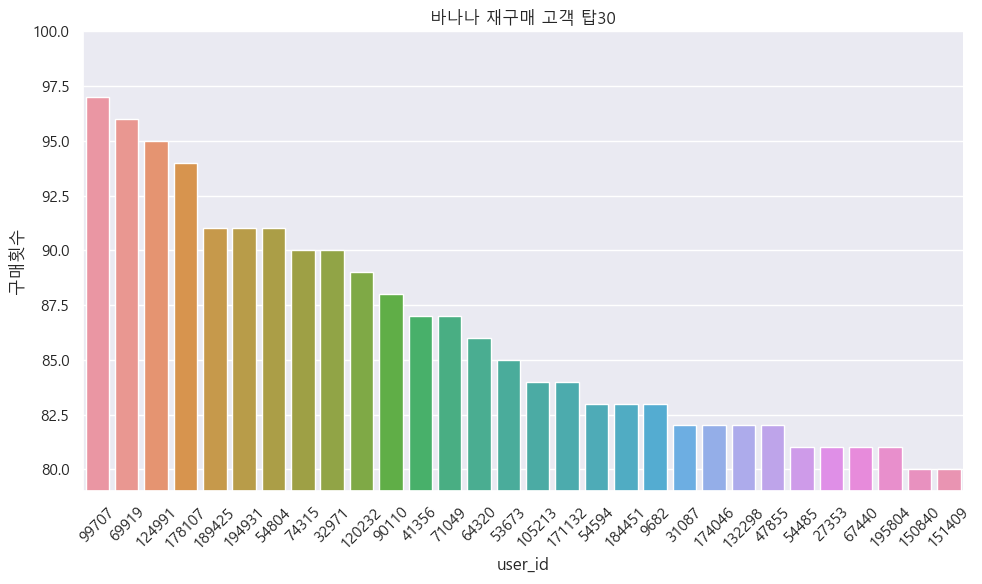

In [26]:
plt.figure(figsize=(10, 6))

sns.barplot(x=banana_reorder.index[:30].astype(str), y=banana_reorder.values[:30])
plt.title('바나나 재구매 고객 탑30')
plt.xlabel('user_id')
plt.ylabel('구매횟수')
plt.ylim(79, 100)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [27]:
# train확인
train_df = df[df['eval_set'] == 'train']
train_df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
24,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,6695,7,1,1540,train,29,1,1,8.0
25,40199,Chocolate Chip Cookies,61,19,cookies cakes,snacks,6695,17,1,1540,train,29,1,1,8.0
26,45051,Pub Mix,107,19,chips pretzels,snacks,6695,6,1,1540,train,29,1,1,8.0
27,10310,Wheat Thins Original,78,19,crackers,snacks,6695,20,1,1540,train,29,1,1,8.0
28,37600,Organic Kettle Corn,23,19,popcorn jerky,snacks,6695,1,1,1540,train,29,1,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33818973,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1656340,1,1,29207,train,17,0,10,10.0
33818995,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1875412,1,1,28831,train,94,5,13,0.0
33818998,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1892376,1,1,98935,train,31,1,10,26.0
33819057,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,3111299,1,1,198410,train,14,6,9,2.0


In [28]:
banana_train = train_df[train_df['product_name'].isin(selected_products)]
banana_train

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1189,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,253400,8,1,21054,train,4,3,14,30.0
2596,24852,Banana,24,4,fresh fruits,produce,468768,1,1,14910,train,61,5,11,7.0
4237,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,767323,3,1,2221,train,24,5,19,16.0
6011,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,1091681,2,1,184744,train,72,4,14,3.0
11287,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,2050666,3,0,193585,train,4,5,9,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750192,37067,Organic Banana,24,4,fresh fruits,produce,2833920,1,1,78409,train,27,5,13,2.0
33751102,39276,Bananas,24,4,fresh fruits,produce,378812,2,0,194872,train,8,0,15,30.0
33751112,39276,Bananas,24,4,fresh fruits,produce,509455,1,1,108134,train,4,4,16,30.0
33751134,39276,Bananas,24,4,fresh fruits,produce,1618153,1,0,26935,train,52,1,6,4.0


In [29]:
banana_train['user_id'].nunique()
#train 확인 끝

36867

* train데이터는 고객별 제일 최근 구매데이터지만 구매 수량이 따로 없기때문에 바나나를 구매한 train의 갯수와 고객의 갯수가 같은수준임.

### 1 - 2. 유기농구매
* 위쪽 pieplot 시각화를 확인해보면 Organic(유기농)단어가 상당히 큰 비중을 차지함

In [30]:
# 전체 판매 품목중 Organic단어가 포함된 품목선정
organic_df = product[product['product_name'].str.contains('Organic')].reset_index(drop=True)
organic_df

,product_id,product_name,aisle_id,department_id
0,23,Organic Turkey Burgers,49,12
1,33,Organic Spaghetti Style Pasta,131,9
2,41,Organic Sourdough Einkorn Crackers Rosemary,78,19
3,43,Organic Clementines,123,4
4,47,Onion Flavor Organic Roasted Seaweed Snack,66,6
...,...,...,...,...
5030,49606,Organic Natural Red,28,5
5031,49608,Certified Organic Spanish Style Rice With Quin...,4,9
5032,49638,Organic Superfirm Vacuum Packed Tofu,14,20
5033,49653,Organic Aromatherapeutic Moroccan Argan Oil Set,25,11


0.10133231363709548


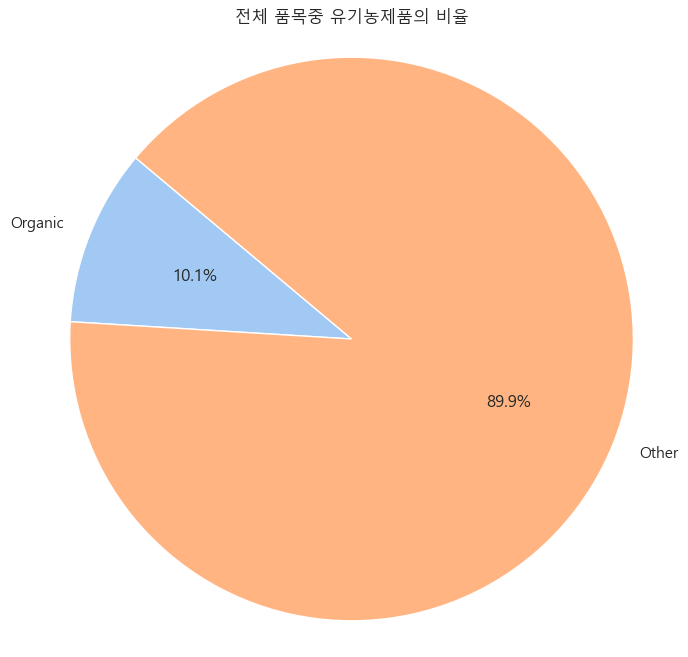

In [31]:
# 전체 품목에서의 유기농 품목의 비율
print(len(organic_df) / len(product))

data = [len(organic_df), len(product) - len(organic_df)]
labels = ['Organic', 'Other']

plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('전체 품목중 유기농제품의 비율')
plt.axis('equal')

plt.show()

* 약 5만개의 판매품목중 유기농 제품은 10퍼센트를 차지함

In [32]:
# 전체 판매내역중 유기농 제품 판매내역 확인
organic_df2 = df[df['product_name'].isin(organic_df['product_name'].values)]
organic_df2

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,28413,Bunny-Luv Organic Carrots,83,4,fresh vegetables,produce,1107,13,0,38259,prior,2,1,11,7.0
11,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,1107,3,1,38259,prior,2,1,11,7.0
28,37600,Organic Kettle Corn,23,19,popcorn jerky,snacks,6695,1,1,1540,train,29,1,1,8.0
33,12542,Organic Creamy Almond Butter,88,13,spreads,pantry,6695,8,1,1540,train,29,1,1,8.0
34,26317,Organic Lemonade,98,7,juice nectars,beverages,6695,11,1,1540,train,29,1,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819087,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,1257076,1,0,75662,prior,5,5,16,30.0
33819088,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,2263873,1,1,6871,prior,8,6,16,2.0
33819089,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,2398850,1,0,202404,prior,3,4,20,1.0
33819090,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,3072891,1,0,159218,prior,16,1,9,27.0


In [33]:
# 유기농제품이 들어있는 카테고리 확인
organic_df2['department'].unique()

array(['produce', 'snacks', 'pantry', 'beverages', 'deli', 'dairy eggs',
       'frozen', 'canned goods', 'bakery', 'dry goods pasta',
       'meat seafood', 'missing', 'breakfast', 'babies', 'personal care',
       'international', 'bulk', 'pets', 'other', 'household', 'alcohol'],
      dtype=object)

* Organic(유기농)이라는 키워드는 상당히 잘먹히는 키워드라 전혀 어울리지 않는 alcohol(주류)제품에도 유기농 키워드가 포함되어있음

In [34]:
# 유기농 주류 제품명 확인
print(set(organic_df2[organic_df2['department'] == 'alcohol']['product_name']))

{'Natural White Organic Wine', 'Organic Chardonnay', 'Organic Nama Sake', 'Lager Beer, Organic, Pure Brewed', 'Organic Reposado Tequila', 'Organic Zero Sulfites Red Wine', 'Organic Pinot Noir', 'Organic Cider', 'Organic Pale Ale', 'Organic Sauvignon Blanc', 'Organic & Raw Grape Kombucha', 'Organic Mendocino Cabernet Sauvignon', 'Organic Malbec', 'Organic Chocolate Stout', 'Organic Natural Red'}


0.31508780864875613


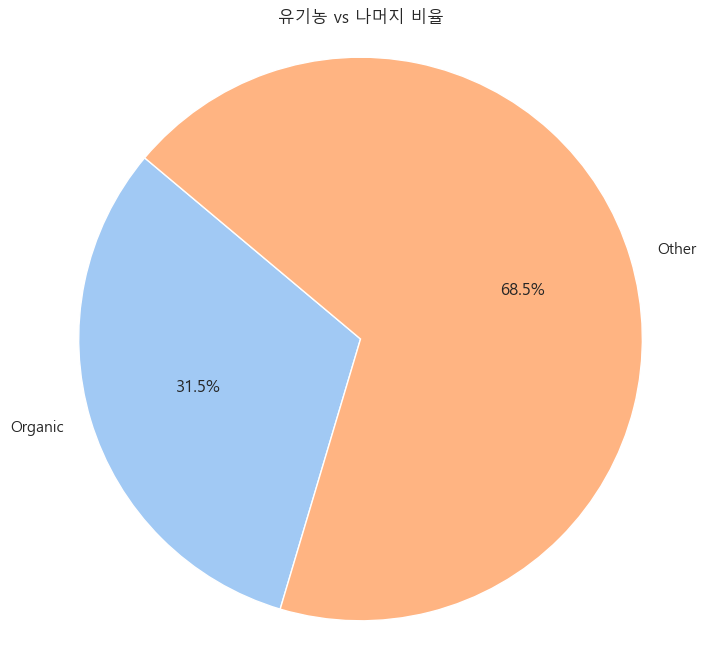

In [35]:
# 전체 판매 내역중 유기농 판매 비율
print(len(organic_df2) / len(df))

data = [len(organic_df2), len(df) - len(organic_df2)]
labels = ['Organic', 'Other']

plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('유기농 vs 나머지 비율')
plt.axis('equal')

plt.show()

* 유기농제품이 전체 판매 품목에서 30%이상을 담당함. 매우 큰 비중

In [36]:
# 유기농제품을 가장 많이 구매한 user_id 추출
organic_df3 = organic_df2['user_id'].value_counts().sort_values(ascending=False).head(30)
organic_df3

user_id
182401    1428
175540    1359
38683     1339
84474     1327
88698     1317
160106    1305
115495    1296
175627    1293
73080     1291
143402    1253
195573    1245
190736    1200
108187    1193
66806     1177
105213    1166
132022    1157
1563      1152
106161    1151
145686    1141
1424      1136
121327    1122
103634    1108
142131    1107
89048     1102
74336     1099
3830      1095
205804    1092
36445     1090
37592     1088
176970    1076
Name: count, dtype: int64

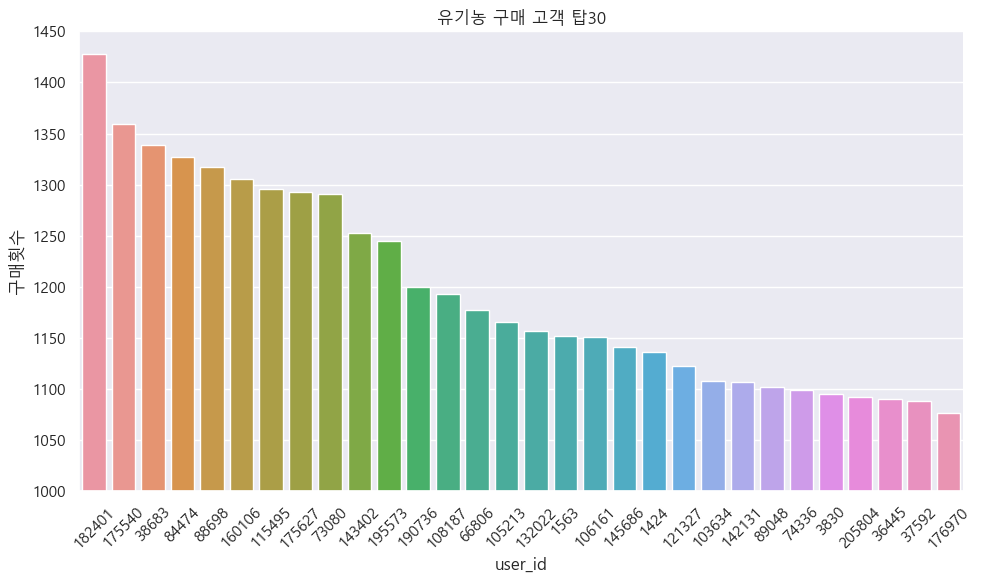

In [37]:
plt.figure(figsize=(10, 6))

sns.barplot(x=organic_df3.index.astype(str), y=organic_df3.values)
plt.title('유기농 구매 고객 탑30')
plt.xlabel('user_id')
plt.ylabel('구매횟수')
plt.ylim(1000, 1450)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

### 2. 재구매집착증
* 재구매 비율이 높은 상품중 판매비율이 유의미한 제품 판별한 후 제품의 특징 파악하기

In [38]:
product_reorder_counts = df.groupby('product_name')['reordered'].agg(['sum', 'count'])
product_reorder_counts.columns = ['reordered_count', 'total_count']

product_reorder_counts['reorder_ratio'] = product_reorder_counts['reordered_count'] / product_reorder_counts['total_count']

top_reorder_ratio = product_reorder_counts.sort_values(by='reorder_ratio', ascending=False)
filtered_top_reorder_ratio = top_reorder_ratio[top_reorder_ratio['total_count'] >= 10000] # 총 판매 갯수 10000개 이상만 보기
filtered_top_reorder_ratio.head(20)

,reordered_count,total_count,reorder_ratio
product_name,,,
"Milk, Organic, Vitamin D",17753,20770,0.854742
Organic Reduced Fat Milk,31394,36869,0.851501
Banana,415166,491291,0.845051
Organic Lowfat 1% Milk,12914,15352,0.841193
Organic Whole Milk,8494,10102,0.840824
"Organic Milk Reduced Fat, 2% Milkfat",10984,13119,0.837259
Bag of Organic Bananas,329275,394930,0.833755
Organic Fat Free Milk,22824,27402,0.832932
Organic Whole Milk,118684,142813,0.831045


* 재구매 비율이 높은제품은  '우유' '요거트'
* 우유는 곧 유제품(dairy eggs)이라는 카테고리에 들어있음 해서 카테고리별 재구매비율을 구해봄
* 해당 표에서의 재미있는 사실은 유제품 조차도 Organic이라는 키워드가 들어간 제품을 선호함

In [39]:
# 카테고리별 재주문 비율 확인하기
dpt_reorder_counts = df.groupby('department')['reordered'].agg(['sum', 'count'])
dpt_reorder_counts.columns = ['reordered_count', 'total_count']

dpt_reorder_counts['reorder_ratio'] = dpt_reorder_counts['reordered_count'] / dpt_reorder_counts['total_count']

top_reorder_ratio = dpt_reorder_counts.sort_values(by='reorder_ratio', ascending=False)
filtered_top_reorder_ratio = top_reorder_ratio[top_reorder_ratio['total_count'] >= 1000]
filtered_top_reorder_ratio

,reordered_count,total_count,reorder_ratio
department,,,
dairy eggs,3773723,5631067,0.670161
beverages,1832952,2804175,0.653651
produce,6432596,9888378,0.650521
bakery,769880,1225181,0.628381
deli,666231,1095540,0.608130
pets,61594,102221,0.602557
babies,253453,438743,0.577680
bulk,20736,35932,0.577090
snacks,1727075,3006412,0.574464


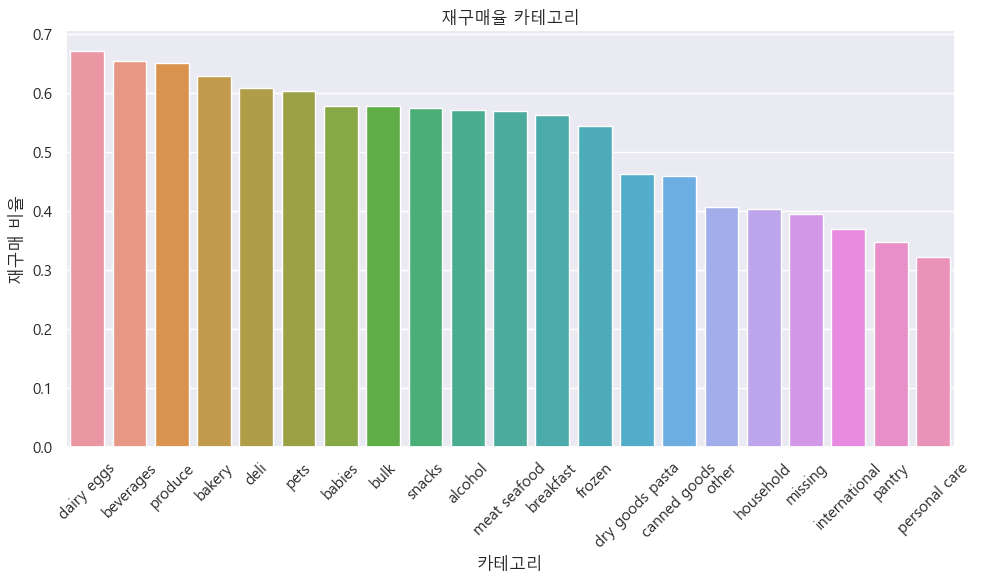

In [40]:
plt.figure(figsize=(10, 6))

sns.barplot(data=filtered_top_reorder_ratio, x=filtered_top_reorder_ratio.index, y='reorder_ratio')
plt.title('재구매율 카테고리')
plt.xlabel('카테고리')
plt.ylabel('재구매 비율')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

* 유제품이 예상대로 가장 재주문율이 높음
* 전체 판매량은 낮지만 재주문율은 높은 카테고리도 분명 존재 (ex : pets)

In [41]:
# 보너스 목표 : 재주문율이 가장높은 제품 하나 선정해서 가장많이 구매한 고객 추출
h_h = df[df['product_name'] == 'Organic Reduced Fat Milk']
h_h

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
49325,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,184509,25,1,63799,prior,26,0,16,0.0
49764,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,2547170,1,1,63799,prior,19,0,18,5.0
49861,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,3202999,5,1,63799,prior,25,0,16,7.0
50507,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,656814,31,1,53190,prior,38,0,15,6.0
51210,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,2028589,2,1,128635,prior,4,1,14,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32840503,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,3415242,2,1,7648,prior,9,1,5,30.0
32840506,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,3418049,3,1,187254,prior,11,1,18,29.0
32840515,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,3419331,1,1,179134,prior,10,3,8,9.0
32840519,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,3420665,1,1,42893,prior,8,0,11,16.0


In [42]:
h_h['user_id'].value_counts()

user_id
99753     96
180621    90
41356     82
150313    82
65320     76
          ..
123788     1
122866     1
161873     1
74510      1
152556     1
Name: count, Length: 5475, dtype: int64

### 3. 마트의 가장 핫한 코너는???
- 불티나게 팔리는 진열대는 어디인가?!?!?
--------------------
### 4. 마트의 가장 조용한 곳...
- 가장 판매실적이 부족한 진열대는 어디??!

In [43]:
position_df = df[['order_id', 'product_id', 'product_name', 'aisle', 'department']]

In [44]:
# 각 aisle의 주문 횟수 계산
aisle_counts = position_df['aisle'].value_counts().reset_index()
aisle_counts.columns = ['aisle', 'order_count']
aisle_counts['aisle'] = aisle_counts['aisle'].astype(str)
aisle_counts

,aisle,order_count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
...,...,...
129,eye ear care,9522
130,baby bath body care,8909
131,baby accessories,8466
132,beauty,6455


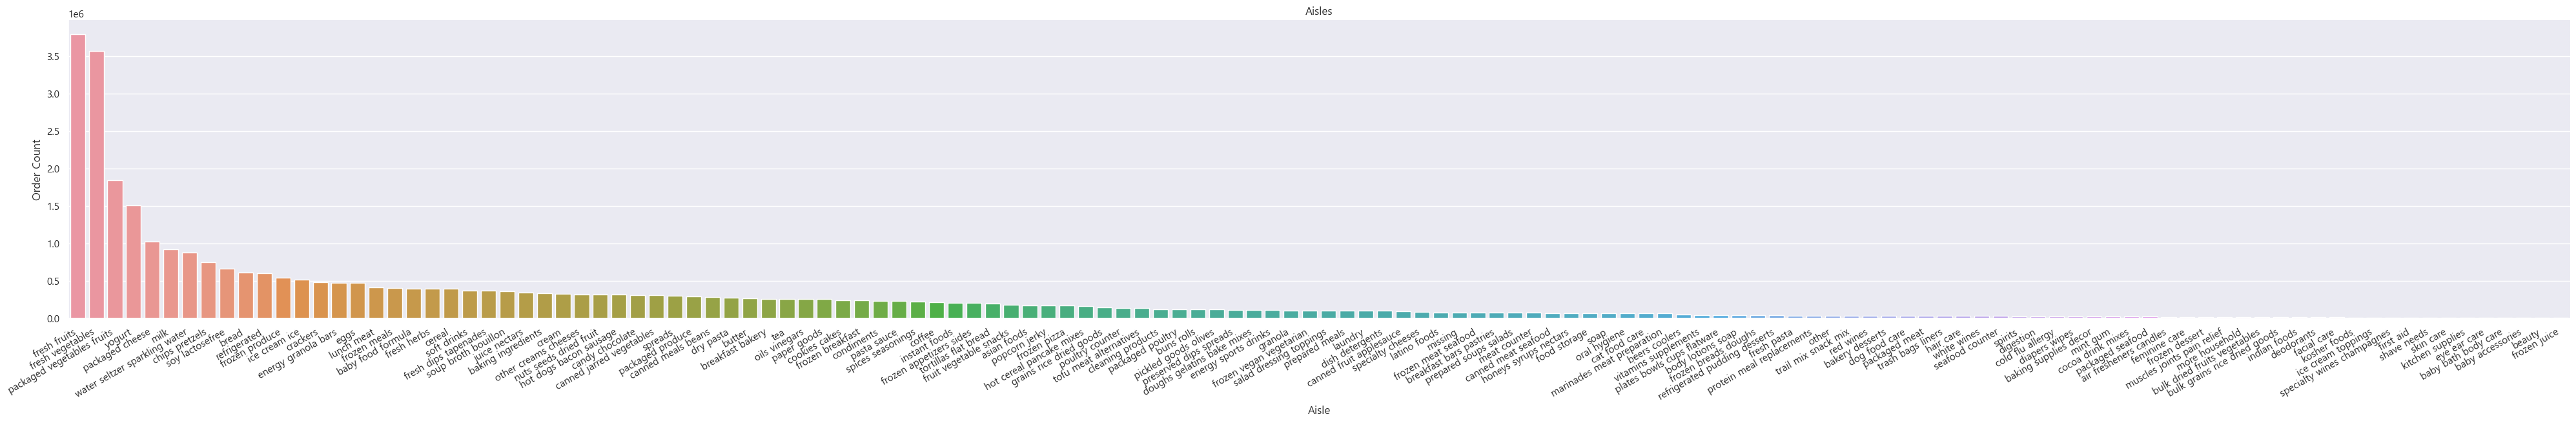

In [45]:
# 전체 제품 위치한 구역의 통로이름 별 주문 수량 시각화
plt.figure(figsize=(50, 6))
ax = sns.barplot(x=aisle_counts["aisle"], y=aisle_counts["order_count"], data=aisle_counts)
plt.title("Aisles")
plt.xlabel("Aisle")
plt.ylabel("Order Count")
# plt.xticks(rotation=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

* 주문량이 많은 통로 구역이 있고, 주문량이 그저그런 통로 구역이 있고, 주문량이 저조한 통로 구역이 있음
* 구역별 주문량의 차이가 매우 큼

In [46]:
# 제품 위치한 구역의 통로이름 별 주문 수량 top10 / bottom10 시각화
# 데이터프레임에서 상위 10개와 하위 10개 aisle 추출
top_10_aisles = aisle_counts.head(10)
bottom_10_aisles = aisle_counts.tail(10)
top_10_aisles

,aisle,order_count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


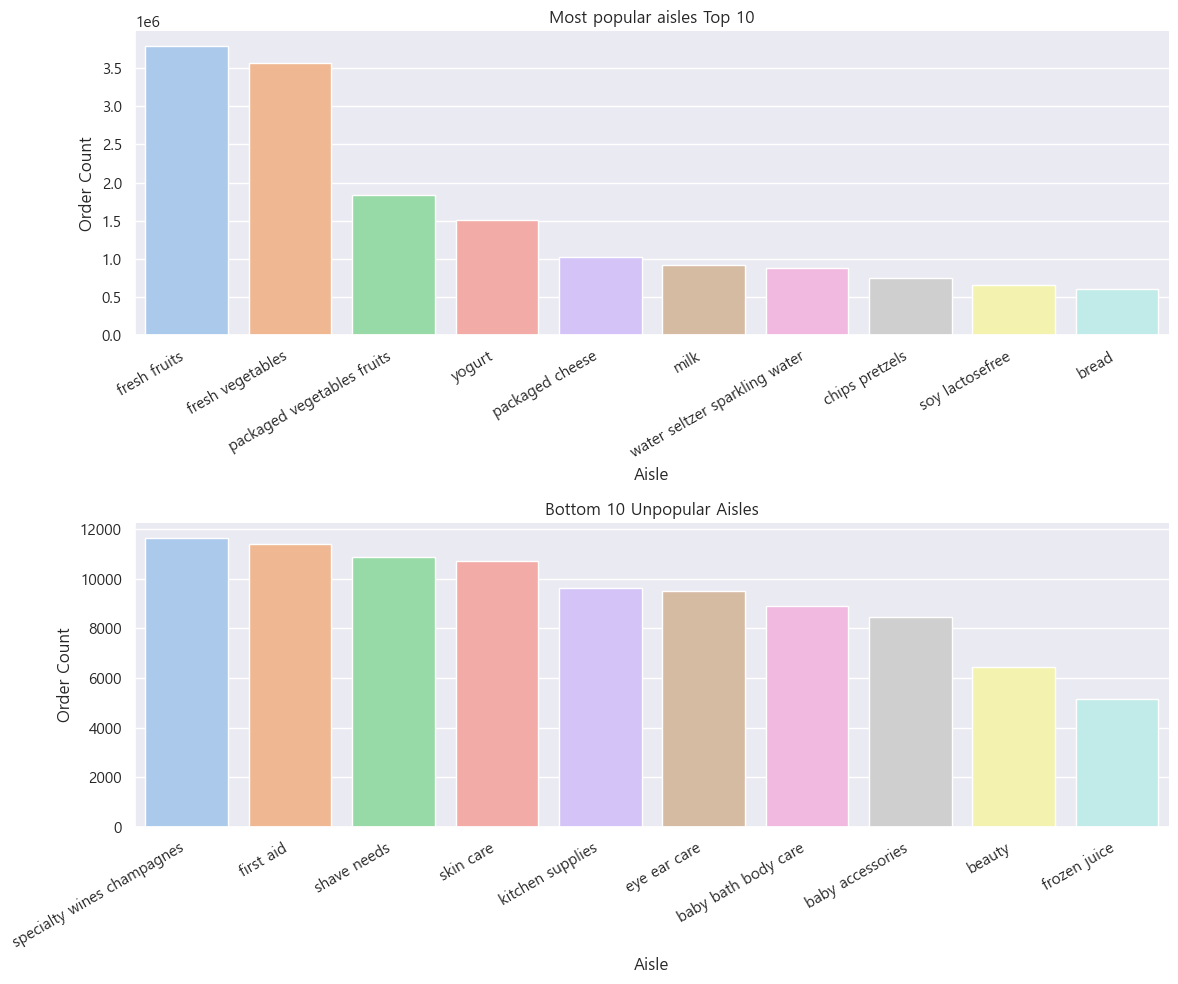

In [47]:
plt.figure(figsize=(12, 10))

# 가장 인기 있는 aisle 시각화
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=top_10_aisles["aisle"], y=top_10_aisles["order_count"], data=top_10_aisles)
plt.title("Most popular aisles Top 10")
plt.xlabel("Aisle")
plt.ylabel("Order Count")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')

# 가장 인기가 없는 aisle 시각화
plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=bottom_10_aisles["aisle"], y=bottom_10_aisles["order_count"], data=bottom_10_aisles)
plt.title("Bottom 10 Unpopular Aisles")
plt.xlabel("Aisle")
plt.ylabel("Order Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

* 상위 품목들은 모두 식품들
* 하위 품목들은 식품과 관련이 없는 제품들이 대다수
* 제일 낮은 냉동 음료의 판매율이 저조한 이유를 현재 컨셉에 맞춘 유기농에 집중해봄

In [48]:
# 냉동음료 제품중 Organic키워드가 들어간 제품 찾기
frozen_j = list(set(df[df['aisle'] == 'frozen juice']['product_name']))
print(len(frozen_j))
print(frozen_j)

47
['Blended Juice Beverage, Mango Orange', 'Cherry Berry Blend', 'Green Fusion Fruit & Veggie Smoothie Blend', 'Organic Cranberry Concentrate', 'Orange Original Frozen Concentrate 100% Juice', 'Frozen Concentrate Non-Alcoholic Pina Colada', 'Frozen Concentrated Orange Juice', 'Cranberry Cocktail from Concentrate', 'Apple Kiwi Strawberry Concentrate Frozen', 'Orange Juice Concentrate', 'Frozen Orange Juice', 'Organic Orange Juice Concentrate', '100% Apple Juice Concentrate', 'Caribbean Passion All Natural Smoothies', '100% Juice Cranberry Blend Frozen Concentrate', '100% Grape Juice Concentrate', 'Frozen Apple Juice', 'Blue Fusion Fruit & Veggie Smoothie', 'Country Style Frozen Orange Juice Concentrate', 'Strawberry Banana Smoothie Tasty American Favorites', 'Orange Peach Mango Juice', 'Apple Cherry Concentrate Frozen', 'Smoothies, Strawberries Wild', 'Frozen Limeade Concentrate', 'Paradise Punch Frozen Juice Concentrate', 'Frozen Concentrated Pulp Free Orange Juice', 'Frozen Concentra

In [50]:
o_f = []
for i in frozen_j:
    if "Organic" in i:
        o_f.append(i)
print(len(o_f), (o_f))

4 ['Organic Cranberry Concentrate', 'Organic Orange Juice Concentrate', 'Organic Frozen Concentrate Lemonade', 'Pitaya Dragonfruit Raw, Organic Smoothie Packs']


* 냉동음료 총 47개중 유기농 제품 4개

In [ ]:
frozen_j_df = df[df['aisle'] == 'frozen juice']
f_j_d_c = frozen_j_df['product_name'].value_counts()
f_j_d_c